### Combined script for all conditions

In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from matplotlib.collections import LineCollection
import seaborn as sns

import trompy as tp
import csv

colors_restricted = "#219C90"
colors_sucralose = "#9c9021"
colors_adlib_light = "#21669c"
colors_adlib_dark =  "#9C2135"


In [2]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    restricted_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_dark.pickle", 'rb') as handle:
    adlib_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_light.pickle", 'rb') as handle:
    adlib_light = pickle.load(handle)

with open(DATAFOLDER / "adlib_sucralose.pickle", 'rb') as handle:
    adlib_sucralose = pickle.load(handle)

In [3]:
def get_list_of_mice(data):

    mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                        "HL202", "HL205", "HL206", "HL211",
                        "HL301", "HL304", "HL305"]
    
    #"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
    #HL 306, 308 have no virus
    #HL301, HL304, HL305 have poor fiber placement
    #HL313 - HL318 are control mice
    
    list_of_mice = []

    for key, val in adlib_dark.items():
        if val["mouse_ID"] not in list_of_mice and val["mouse_ID"] not in mice_to_exclude:
            list_of_mice.append(val["mouse_ID"])
            
    return list_of_mice

In [14]:
def get_snips(data):
    
    list_of_mice = get_list_of_mice(data)

    snips_mean_start= []
    snips_mean_end = []
    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    for mouse in list_of_mice:
        snips_start = []
        snips_end = []
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6,2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)


        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
   
    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_start, snips_mean_end, snips_mean_full

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 p

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
add

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0.0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

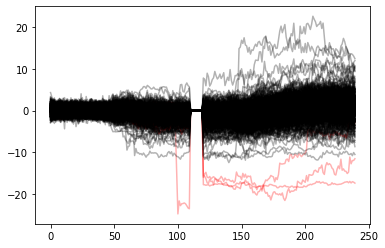

In [19]:
#getting snips
restricted_start, restricted_end, restricted_full = get_snips(restricted_dark)
dark_start, dark_end, dark_full = get_snips(adlib_dark)
light_start, light_end, light_full = get_snips(adlib_light)
sucralose_start, sucralose_end, sucralose_full = get_snips(adlib_sucralose)

##takes into account that last mouse does not have data - could look into it

#indices_to_keep = [0,1,2,3,4,6]
#sucralose_full = np.array(sucralose_full[indices_to_keep])

#temp_list = []
#for mouse in sucralose_full:
#    temp_list.append(mouse)
    
#sucralose_full = np.array(temp_list)


In [20]:
print(len(restricted_full))
print(len(light_full))
print(len(dark_full))
print(len(sucralose_full))


7
7
7
7


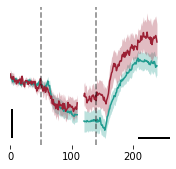

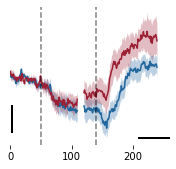

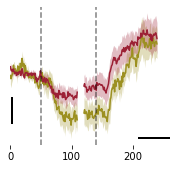

In [78]:
def plot_shaded_error(data, color, ax):
    
    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1
    eventbalance=[6,2]

    try:
        assert(eventbalance[0] + eventbalance[1] == mineventlength)
        early_t = eventbalance[0]
        late_t = eventbalance[1]
    except:
        print("No event balance given. Using default 50-50 split.")
        early_t = mineventlength/2
        late_t = mineventlength/2
            
    bins_early = int((pre + early_t) / binlength)
    bins_late = int((post + late_t) / binlength)

    # data1
    x1 = np.arange(0,bins_early)
    x2 = np.arange(data.shape[1] - bins_late, data.shape[1])

    mean = np.mean(data, axis=0)
    error_values = np.std(data, axis=0) / np.sqrt(len(data))

    ax.plot(x1, mean[:bins_early], color=color)
    ax.plot(x2, mean[-bins_late:], color=color)

    ax.fill_between(x1, mean[:bins_early]-error_values[:bins_early], 
                    mean[:bins_early]+error_values[:bins_early], 
                    color=color, alpha=0.3,
                    linewidth=0,
                    )
    ax.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], 
                    mean[-bins_late:]+error_values[-bins_late:], 
                    color=color, alpha=0.3,
                    linewidth=0
                    )
    

def make_snips_plot(data1, data2, color1, color2):
    
    f, ax =plt.subplots(figsize=[2.7,2],
                    gridspec_kw={
                                "hspace":0.3,
                                "left":0.16,
                                "right":0.98,
                                "top":0.98,
                                "bottom":0.02}
                    )



    # data2
    
    plot_shaded_error(data1, color1, ax)
    plot_shaded_error(data2, color2, ax)

    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

    ax.set_yticks([])
    #ax.set_xticks([])
    ax.set_xlim([0,260])

    transform = blended_transform_factory(ax.transData, ax.transAxes)
    ax.plot([210,260], [0.05, 0.05], linewidth=2, color="k", transform=transform)

    ax.plot([2,2], [-1, -2], linewidth=2, color="k")

    ax.axvline(50, color="k", linestyle="--", alpha=0.5)
    ax.axvline(140, color="k", linestyle="--", alpha=0.5)
    
    return f

f = make_snips_plot(restricted_full, dark_full, colors_restricted, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "hungry_vs_not_snips.pdf")

f = make_snips_plot(light_full, dark_full, colors_adlib_light, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "light_vs_dark_snips.pdf")

f = make_snips_plot(sucralose_full, dark_full, colors_sucralose, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "calories_vs_not_snips.pdf")

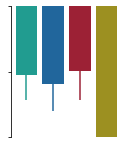

In [15]:
def auc(data, epoch=(50,100)):
    return np.trapz(np.array(data)[:, epoch[0]:epoch[1]], axis=1)

def mean_auc(data, epoch=(50,100)):
    return np.mean(auc(data, epoch=epoch))

f, ax = plt.subplots(figsize=(2,2.4))

ax.bar([1,2,3,4],
       [mean_auc(restricted_full),
        mean_auc(light_full),
        mean_auc(dark_full),
        mean_auc(sucralose_full)
        ],
       color=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
         )

for x, ydata, color in zip([1,2,3,4],
                            [auc(restricted_full),
                            auc(light_full),
                            auc(dark_full),
                            auc(sucralose_full)
                            ],
                            [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
                            ):
    
    ax.errorbar(x, np.mean(ydata),
                yerr=np.std(ydata) / np.sqrt(len(ydata)),
                color=color,
                zorder=0
                      ),
    
ax.set_xticks([])
ax.set_ylim([-60, 0])
ax.set_yticks([-60, -30, 0])
ax.set_yticklabels([])

for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
f.savefig(FIGSFOLDER / "start_auc.pdf")

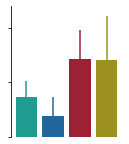

In [19]:
post_epoch = (210,260)

f, ax = plt.subplots(figsize=(2,2.4))

ax.bar([1,2,3,4],
       [mean_auc(restricted_full, epoch=post_epoch),
        mean_auc(light_full, epoch=post_epoch),
        mean_auc(dark_full, epoch=post_epoch),
        mean_auc(sucralose_full, epoch=post_epoch)
        ],
       color=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
         )

for x, ydata, color in zip([1,2,3,4],
                            [auc(restricted_full, epoch=post_epoch),
                            auc(light_full, epoch=post_epoch),
                            auc(dark_full, epoch=post_epoch),
                            auc(sucralose_full, epoch=post_epoch)
                            ],
                            [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
                            ):
    
    ax.errorbar(x, np.mean(ydata),
                yerr=np.std(ydata) / np.sqrt(len(ydata)),
                color=color,
                zorder=0
                      ),
    
ax.set_ylim([0, 120])
ax.set_yticks([0, 50, 100])
ax.set_yticklabels([])
ax.set_xticks([])

for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
f.savefig(FIGSFOLDER / "end_auc.pdf")

0.24570015630919834
-0.6946060757917043
0.15156154634132718
0.27605361680110035
-2.8863125303924675
0.2414530371319754


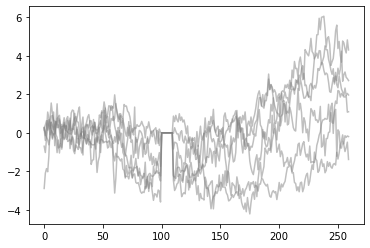

In [23]:
for s in sucralose_full:
    plt.plot(s, color="gray", alpha=0.5)
    print(s[0])